Set the structure of nerual network:
1. init: set the number of nodes in input, hidden, ouptu';
2. train
3. query.

In [75]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [76]:

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        # wih is weight of input_node with hidden_nodes
        # Ax = y, so is rows time columns.
        # w11 w21 w31 hidden node 1 = input1 * w11 + input2 * w21 + input3 * w31
        # w12 w22 w23
        # mean = 0, std = 1/sqrt(the number of inputs)
        self.wih = (np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)))
        # who is weight of hidden_node with output_nodes
        self.who = (np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)))
        # create the weights matrix, and initial the values
        
        self.activation_function = lambda x: scipy.special.expit(x)
    
    def train(self, inputs_list, targets_list):
        # due to input is list, have to convert to vector.
        inputs  = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs) 
        
        # error is the difference between targets and predictions
        outputs_error = targets - final_outputs
        
        # backpropagation to update the weight.
        # error_hidden = w.T times error_outputs. <ignore the Denominator>
        hidden_errors = np.dot(self.who.T, outputs_error)
        # optimize the weight between hidden and output, using outputs_error.
        
        # optimize the weight between hidden and output
        self.who += self.lr * np.dot((outputs_error * final_outputs
                                     * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # optimize the weight between input and hidden, 
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs
                                     * (1.0 - hidden_outputs)), np.transpose(inputs))
        
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        self.hidden_inputs = hidden_inputs
        hidden_outputs = self.activation_function(hidden_inputs)
        self.hidden_outputs = hidden_outputs
        
        # calculate signals into final output
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs) 
        self.final_outputs = final_outputs
        
        return final_outputs

In [78]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes,
                 learning_rate)
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# add the epoch to increase the accuracy
epochs = 10

time_start = time.time()
for num in range(epochs):
    # train in neural network
    time_start_l = time.time()
    for record in training_data_list:
        all_values = record.split(",")
        # standard the input values
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.001
    #     print(len(inputs))
        targets = np.zeros(output_nodes) + 0.001
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
    time_end_l = time.time()
    print("Epoch ", num, "cost time is ", time_end_l-time_start_l, "s")
time_end = time.time()
print('Total time cost: ',time_end-time_start,'s')

Epoch  0 cost time is  178.79647493362427 s
Epoch  1 cost time is  228.44203519821167 s
Epoch  2 cost time is  178.37789344787598 s
Epoch  3 cost time is  246.73046278953552 s
Epoch  4 cost time is  185.96340131759644 s
Epoch  5 cost time is  185.80778002738953 s
Epoch  6 cost time is  405.96918058395386 s
Epoch  7 cost time is  487.1035189628601 s
Epoch  8 cost time is  185.3349437713623 s
Epoch  9 cost time is  175.4619607925415 s
Total time cost:  2457.9988486766815 s


In [ ]:
# verify 

# test
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

score = []
for record in test_data_list:
    all_value = record.split(",")
    correct_label = int(all_value[0])
#     print(correct_label, "Correct label.")
    inputs = (np.asfarray(all_value[1:]) / 255.0 * 0.99) + 0.001
    outputs = n.query(inputs)
    label = np.argmax(outputs)
#     print(label, "Network's answer.")
    if label == correct_label:
        score.append(1)
    else:
        score.append(0)
print("Accuracy: ", sum(score)/len(score))

In [29]:
input_ndoes = hidden_nodes = output_nodes =3
learning_rate = 0.3
n = neuralNetwork(input_ndoes, hidden_nodes, output_nodes, learning_rate)


In [5]:
import numpy 
# initial matrix of weight, <3 * 3>. 
# init is -1/sqrt(3) to 1/sqrt(3)
numpy.random.rand(3,3) -0.5

array([[-0.08717755,  0.35480281, -0.22138196],
       [-0.04491063,  0.48439452, -0.20992589],
       [-0.24422478,  0.04926874, -0.01334356]])

In [30]:
n.query([1.0, 0.5, -1.5]) # input vector x

array([[0.43939036],
       [0.54231507],
       [0.65216172]])

In [31]:
n.train([1.0, 0.5, -1.5], [2.0, 1.0, -1.0])

In [33]:
n.query([1.0, 0.5, -1.5])

array([[0.47674228],
       [0.55051289],
       [0.6154736 ]])

In [34]:
data_file = open("mnist_dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [36]:
len(data_list)

100

In [39]:
len(data_list[0])

1846

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

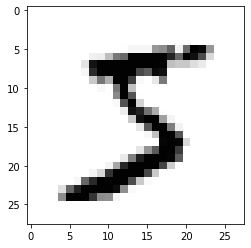

In [43]:
all_values = data_list[0].split(",")
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation='None')

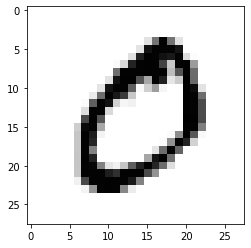

In [44]:
all_values = data_list[1].split(",")
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation='None')

In [47]:
standard_inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.001
standard_inputs
# still reach 1

array([0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.001     , 0.001  

In [49]:
# let neural network ouput is 0/1 in length of 10 vector.
onodes = 10
targets = np.zeros(onodes) + 0.001
targets[int(all_values[0])] = 0.99
targets

array([0.99 , 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001])

In [69]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes,
                 learning_rate)
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()


# train in neural network
for record in training_data_list:
    all_values = record.split(",")
    # standard the input values
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.001
#     print(len(inputs))
    targets = np.zeros(output_nodes) + 0.001
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

In [71]:
# test
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

7


array([[8.66753173e-05],
       [2.14290626e-06],
       [2.12251296e-04],
       [2.39607445e-05],
       [5.49672620e-06],
       [2.72128352e-06],
       [5.15070043e-06],
       [9.99867433e-01],
       [3.95343957e-05],
       [2.43071114e-04]])

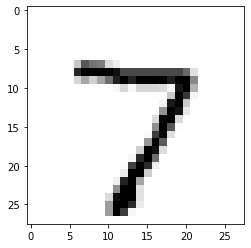

In [72]:
all_value = test_data_list[0].split(",")
print(all_value[0])
image_array = np.asfarray(all_value[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation='None')
n.query((np.asfarray(all_value[1:]) / 255.0 * 0.99) + 0.001)

In [73]:
# verify 

# test
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

score = []
for record in test_data_list:
    all_value = record.split(",")
    correct_label = int(all_value[0])
#     print(correct_label, "Correct label.")
    inputs = (np.asfarray(all_value[1:]) / 255.0 * 0.99) + 0.001
    outputs = n.query(inputs)
    label = np.argmax(outputs)
#     print(label, "Network's answer.")
    if label == correct_label:
        score.append(1)
    else:
        score.append(0)
print(sum(score)/len(score))

7 Correct label.
7 Network's answer.
2 Correct label.
2 Network's answer.
1 Correct label.
1 Network's answer.
0 Correct label.
0 Network's answer.
4 Correct label.
4 Network's answer.
1 Correct label.
1 Network's answer.
4 Correct label.
4 Network's answer.
9 Correct label.
9 Network's answer.
5 Correct label.
6 Network's answer.
9 Correct label.
9 Network's answer.
0 Correct label.
0 Network's answer.
6 Correct label.
6 Network's answer.
9 Correct label.
9 Network's answer.
0 Correct label.
0 Network's answer.
1 Correct label.
1 Network's answer.
5 Correct label.
5 Network's answer.
9 Correct label.
9 Network's answer.
7 Correct label.
7 Network's answer.
3 Correct label.
3 Network's answer.
4 Correct label.
4 Network's answer.
9 Correct label.
9 Network's answer.
6 Correct label.
6 Network's answer.
6 Correct label.
6 Network's answer.
5 Correct label.
5 Network's answer.
4 Correct label.
4 Network's answer.
0 Correct label.
0 Network's answer.
7 Correct label.
7 Network's answer.
4

0.9341
